## Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated

In [1]:
# importing Libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading dataset
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MEDV']=data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
            X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

<AxesSubplot:>

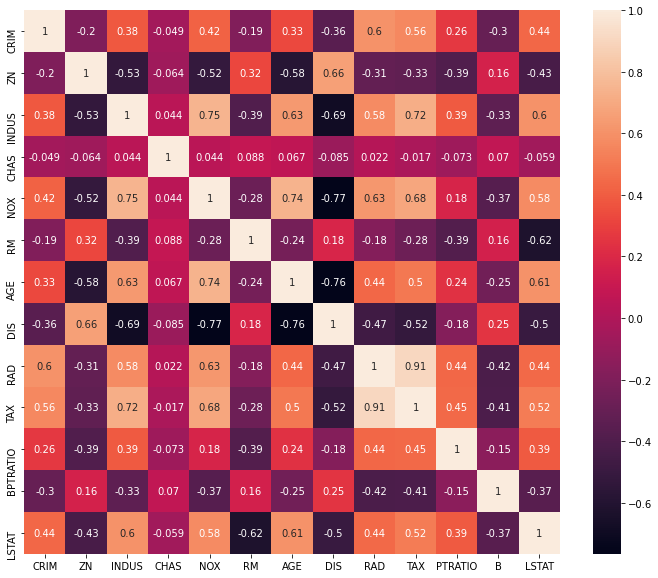

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using pearson correlation
plt.figure(figsize=(12,10))
cor= X_train.corr()
sns.heatmap(cor, annot=True)


In [17]:
# with the following function we will remove highly correlated functions
# we will perform this only on the training data

def correlation(dataset,threshold):
    col_corr=set() # it will contain the names of the correlated features
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [18]:
corr_features= correlation(X_train,0.7)
len(corr_features)

3

In [19]:
corr_features

{'AGE', 'NOX', 'TAX'}

In [20]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)


,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,6.0622,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,1.9356,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,1.4261,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,3.3175,4.0,18.4,396.90,4.54
